## Check normality of the outcome data (age of onset)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from scipy.stats import shapiro, kstest, normaltest, norm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler

In [3]:
# Directories

# Change working directory
os.chdir('/media/HDD_4TB_1/jordi/cfuses_gnn_enrollhd_2024/')

# Data directory
data_dir = "data/features/"

In [4]:
# Load outcome vector (age of onset)
y = pd.read_csv(data_dir + "aoo.txt", sep = "\t")
y.set_index('FID_IID', inplace=True)
y = y['Onset.Age'].to_numpy()

### Graphical normality tests

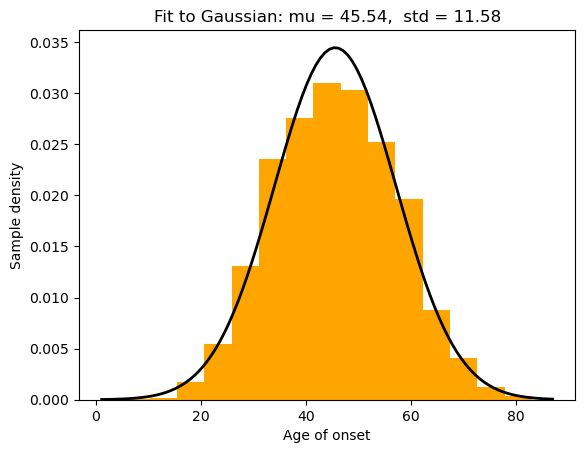

In [53]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y)

# Plot the histogram.
plt.hist(y, bins=15, density=True, color='orange')
plt.xlabel('Age of onset')
plt.ylabel('Sample density')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit to Gaussian: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

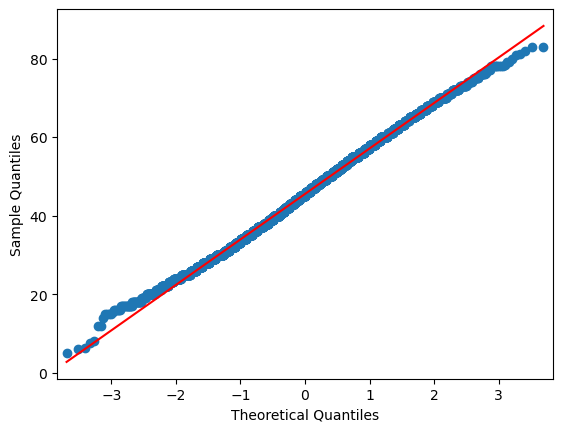

In [7]:
# q-q plot, comparing with defaul scipy.stats.distributions.norm (standard normal)
qqplot(y, line='s');

From graphical representations we can consider the outcome variable values to be drawn from a normal distribution.

### Statistical methods

**Shapiro-Wilk** test takes as null hypothesis that the data comes from a normal distribution.

In [41]:
#perform Shapiro-Wilk test for normality
shapiro(y)

/tmp/ipykernel_3203803/3125102296.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  shapiro(y).pvalue


4.054583662632044e-11

**Kolmogorov-Smirnov** test also takes as null hypothesis that the data comes from a normal distribution.

In [9]:
kstest(y, 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. 

In [10]:
normaltest(y)

NormaltestResult(statistic=69.11335383533138, pvalue=9.822587398916974e-16)

### Transforming data to make it more normal

#### Log Transform

In [11]:
# Log transform the vector
y_tlog = np.log(y)

In [12]:
# Test
print(kstest(y_tlog, 'norm'))
print(shapiro(y_tlog))

KstestResult(statistic=0.9957851367714062, pvalue=0.0, statistic_location=2.772588722239781, statistic_sign=-1)
ShapiroResult(statistic=0.9683703345889376, pvalue=1.49256172006708e-40)


/tmp/ipykernel_3203803/4221328669.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_tlog))


#### Reciprocal Transform

In [13]:
# Compute the reciprocals of the vector's values
y_trec = (1/y)

In [14]:
# Test
print(kstest(y_trec, 'norm'))
print(shapiro(y_trec))

KstestResult(statistic=0.5048064172161192, pvalue=0.0, statistic_location=0.012048192771084338, statistic_sign=-1)
ShapiroResult(statistic=0.7885406498942871, pvalue=1.5428068981221253e-75)


/tmp/ipykernel_3203803/3979265643.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_trec))


#### Exponent Transform

In [15]:
# Compute the reciprocals of the vector's values
y_texp = y**(1/3)

In [16]:
# Test
print(kstest(y_texp, 'norm'))
print(shapiro(y_texp))

KstestResult(statistic=0.9927707583137305, pvalue=0.0, statistic_location=2.5667360038239204, statistic_sign=-1)
ShapiroResult(statistic=0.9875043761400424, pvalue=1.6957547229688073e-27)


/tmp/ipykernel_3203803/606703423.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_texp))


#### Box-Cox Transform

In [38]:
# Load the data again because sklearn transformations want column

# For transformation of 10% of total samples (toy example) 
#y_col = pd.read_csv(data_dir + "y_pc10.txt", sep = "\t")
# For transformation of all 9064 samples
y_col = pd.read_csv(data_dir + "aoo.txt", sep = "\t")

y_col.set_index('FID_IID', inplace=True)
y_col = y_col.to_numpy()

In [31]:
# Create transformer
boxcox = PowerTransformer(method="box-cox")

# Transform data
y_boxcox = boxcox.fit_transform(y_col)

In [32]:
# Test
print(kstest(y_boxcox, 'norm'))
print(shapiro(y_boxcox))

KstestResult(statistic=array([0.02515588]), pvalue=array([2.04672247e-05]), statistic_location=array([0.82084264]), statistic_sign=array([-1.]))
ShapiroResult(statistic=0.9978872116363343, pvalue=6.981577990811396e-10)


/tmp/ipykernel_3203803/2230618452.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_boxcox))


#### Yeo-Johnson Transform

In [19]:
# Create transformer
yeo = PowerTransformer(method="yeo-johnson")

# Transform data
y_yeo = yeo.fit_transform(y_col)

In [20]:
# Test
print(kstest(y_yeo, 'norm'))
print(shapiro(y_yeo))

KstestResult(statistic=array([0.02516729]), pvalue=array([2.02550409e-05]), statistic_location=array([0.8208827]), statistic_sign=array([-1.]))
ShapiroResult(statistic=0.9978823907386999, pvalue=6.722425478682418e-10)


/tmp/ipykernel_3203803/3935146738.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_yeo))


#### Standardization

Standardize the outcome vector by removing the mean and scaling to unit variance.

In [39]:
# Standardize the data 
scaler = StandardScaler()

# Transform data
y_scal = scaler.fit_transform(y_col) 

In [40]:
# Test
print(kstest(y_scal, 'norm'))
print(shapiro(y_scal))

KstestResult(statistic=array([0.02902754]), pvalue=array([4.54840958e-07]), statistic_location=array([-0.47839574]), statistic_sign=array([1.]))
ShapiroResult(statistic=0.9975062132756388, pvalue=4.054583662632044e-11)


/tmp/ipykernel_3203803/1872134628.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_scal))


#### Robust scaler + Standard scaler

`RobustScaler` removes the median and scales the data in the interquartile range so that it is robust to outliers. 

In [34]:
robust = RobustScaler()
y_rob = robust.fit_transform(y_col)

In [35]:
# Test
print(kstest(y_rob, 'norm'))
print(shapiro(y_rob))

KstestResult(statistic=array([0.1001575]), pvalue=array([1.31761557e-79]), statistic_location=array([-0.89235294]), statistic_sign=array([-1.]))
ShapiroResult(statistic=0.9975062132756386, pvalue=4.05458366262484e-11)


/tmp/ipykernel_3203803/1441341893.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9064.
  print(shapiro(y_rob))


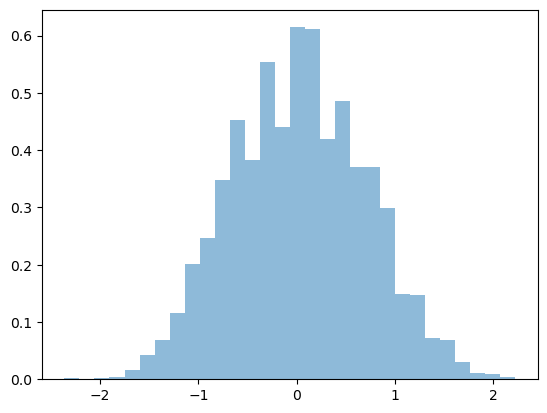

In [37]:
# Plot the transformed data 
plt.hist(y_rob, bins=30, density=True,  
                         alpha=0.5, label='normalized') 
plt.show()

### Bootstrapping

In [46]:
# Number of bootstrap samples
n_bootstrap = 800

# Initialize array to store bootstrap sample means
normality_test_p_values = np.zeros(n_bootstrap)

# Perform bootstrapping
for i in range(n_bootstrap):
    # Generate bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(y, size=len(y)//10, replace=True)
    # Calculate mean of bootstrap sample
    normality_test_p_values[i] = shapiro(bootstrap_sample).pvalue

In [48]:
sum(normality_test_p_values<0.05)

557

### Dividing the vector into subsets and studying their individual normality

In [38]:
# Number of subsets
num_subsets = 30

# Shuffle the vector
random.seed(73)
random.shuffle(y)

# Calculate size of each subset
subset_size = len(y) // num_subsets

# Create subsets
random_subsets = []
for i in range(num_subsets - 1):
    subset = y[i * subset_size: (i + 1) * subset_size]
    random_subsets.append(subset)

In [39]:
pvals = []

# Perform Shapiro-Wilk test for normality for each subset
for subset in random_subsets:
    pvals.append(shapiro(subset).pvalue)

In [40]:
not_norm = sum(1 for val in pvals if val<0.05)

In [41]:
print('In',((num_subsets-not_norm)/num_subsets) * 100,'% of subsets of size', subset_size, "we can't reject the null hypothesis of normality.")

In 80.0 % of subsets of size 302 we can't reject the null hypothesis of normality.
